<a href="https://colab.research.google.com/github/pilatova/prot-viz-data/blob/test/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/pilatova/prot-viz-data/test/dist2.tsv"

dist = pd.read_csv(
    url,
    sep='\t',           # Tab separator for TSV files
    header=0,           # Use the first row as headers
    index_col=0         # Set the first column ("protein_id") as the index
)

dist.head()

,human-baboon,human-cow,human-dog,human-mouse,human-opossum,baboon-cow,baboon-dog,baboon-mouse,baboon-opossum,cow-dog,cow-mouse,cow-opossum,dog-mouse,dog-opossum,mouse-opossum
protein_id,,,,,,,,,,,,,,,
A0A087WTH1,0.029031,0.154998,0.110481,0.196955,0.344118,0.144013,0.109375,0.232052,0.385447,0.138486,0.217262,0.389459,0.192162,0.368851,0.437878
A0A087WZ39,0.103670,0.377518,0.391924,0.578767,0.941801,0.453725,0.498146,0.613333,1.076725,0.406620,0.474470,0.844741,0.525629,0.926316,1.071503
A0A096LP49,0.160867,0.640212,0.633581,0.685461,2.314668,0.667860,0.642229,0.718148,2.226590,0.552318,0.822833,2.328829,0.775940,2.277628,2.473843
A0A0U1RRA0,0.016778,0.143482,0.109374,0.167911,0.544500,0.162434,0.128345,0.148527,0.536199,0.088828,0.183459,0.661912,0.089641,0.556196,0.551611
A0A126GWI2,0.061848,0.209570,0.176613,0.199606,0.276475,0.206727,0.171825,0.195499,0.269331,0.161940,0.212899,0.259762,0.185132,0.232008,0.252956


# Basic Data Analysis

In [2]:
# ----------------------
# Basic Data Checks
# ----------------------

# 1. Check for missing values
print("Missing values per column:")
display(dist.isnull().sum())

Missing values per column:


,0
human-baboon,0
human-cow,0
human-dog,0
human-mouse,0
human-opossum,0
baboon-cow,0
baboon-dog,0
baboon-mouse,0
baboon-opossum,0
cow-dog,0


In [3]:
# 2. Check data types
print("\nData types:")
display(dist.dtypes)


Data types:


,0
human-baboon,float64
human-cow,float64
human-dog,float64
human-mouse,float64
human-opossum,float64
baboon-cow,float64
baboon-dog,float64
baboon-mouse,float64
baboon-opossum,float64
cow-dog,float64


In [4]:
# 3. Check numeric ranges (all values should be ≥0)
print("\nValue ranges:")
display(dist.describe())

# 4. Check for negative values (invalid for evolutionary distances)
negative_values = (dist < 0).any().any()
print(f"\nNegative values present? {negative_values}")
print(f"\nRows containing negative values:")
display(dist[(dist < 0).any(axis=1)])

# 5. Check index uniqueness (protein IDs should be unique)
print(f"\nUnique protein IDs? {dist.index.is_unique}")

# 6. Check row/column counts
print(f"\nData shape: {dist.shape} (rows x columns)")


Value ranges:


,human-baboon,human-cow,human-dog,human-mouse,human-opossum,baboon-cow,baboon-dog,baboon-mouse,baboon-opossum,cow-dog,cow-mouse,cow-opossum,dog-mouse,dog-opossum,mouse-opossum
count,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000
mean,0.038382,0.129694,0.123894,0.157894,0.285598,0.141570,0.136912,0.169103,0.298921,0.128231,0.181213,0.299111,0.177729,0.298082,0.317772
std,0.069838,0.129373,0.126826,0.151289,0.255533,0.147768,0.145471,0.165949,0.270132,0.137583,0.175140,0.270242,0.171626,0.269467,0.283351
min,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,-1.000000,0.000010
25%,0.007703,0.039579,0.035248,0.050342,0.106073,0.042359,0.038080,0.053805,0.110401,0.036623,0.060014,0.112332,0.057303,0.109874,0.119185
50%,0.021102,0.093793,0.086754,0.115105,0.217207,0.100132,0.094019,0.123021,0.226567,0.089095,0.132659,0.226829,0.128338,0.225141,0.240641
75%,0.044141,0.178643,0.170895,0.216196,0.388580,0.191181,0.185440,0.230195,0.404650,0.173883,0.246104,0.404839,0.243410,0.403087,0.428674
max,1.797991,2.155932,1.328868,1.683248,2.782719,2.441345,2.040214,3.030621,3.452648,2.477352,2.735270,3.005446,1.830683,3.079467,3.075986



Negative values present? True

Rows containing negative values:


,human-baboon,human-cow,human-dog,human-mouse,human-opossum,baboon-cow,baboon-dog,baboon-mouse,baboon-opossum,cow-dog,cow-mouse,cow-opossum,dog-mouse,dog-opossum,mouse-opossum
protein_id,,,,,,,,,,,,,,,
Q8IYW2,0.189938,0.426894,0.205668,0.475243,0.675513,0.743782,0.190153,0.451264,1.776299,0.451167,0.529828,0.739962,0.263684,-1.0,0.727156



Unique protein IDs? True

Data shape: (13021, 15) (rows x columns)


In [5]:
# Check for unreasonably large distances (e.g., >10)
max_value = dist.max().max()
print(f"Maximum distance value: {max_value}")

# Check for zeros (if they should not exist between species)
zero_values = (dist == 0).any().any()
print(f"Zero values present? {zero_values}")

Maximum distance value: 3.452648
Zero values present? False


In [6]:
print(f"\nDrop row with negative value:")
dist.drop(dist[(dist < 0).any(axis=1)].index, inplace=True)
display(dist[(dist < 0).any(axis=1)])


Drop row with negative value:


,human-baboon,human-cow,human-dog,human-mouse,human-opossum,baboon-cow,baboon-dog,baboon-mouse,baboon-opossum,cow-dog,cow-mouse,cow-opossum,dog-mouse,dog-opossum,mouse-opossum
protein_id,,,,,,,,,,,,,,,


In [7]:
dist.to_csv('dist3.tsv', sep = '\t', encoding='utf-8', index=True)

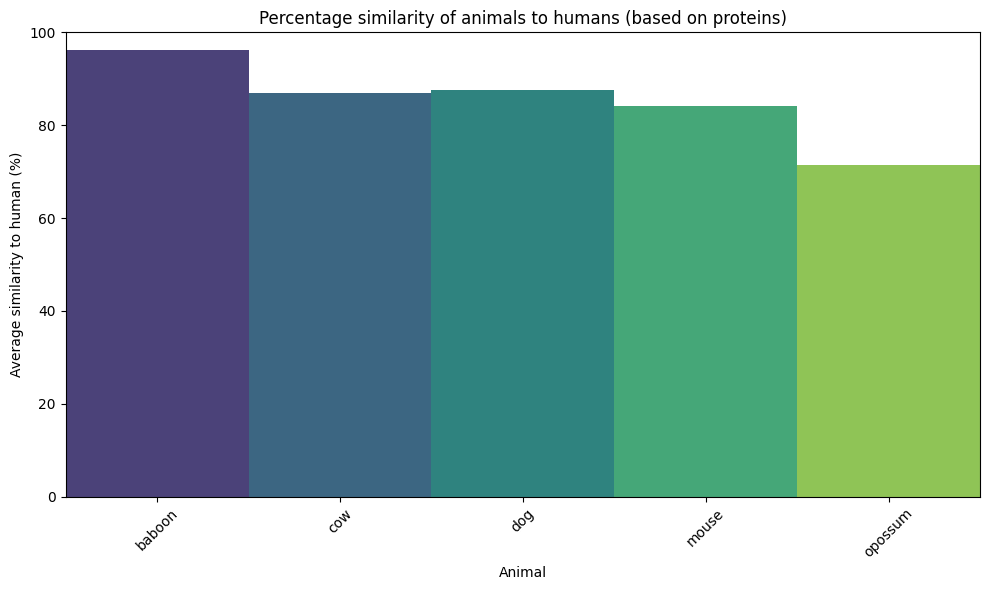

Najpodobnejšie zviera človeku je: baboon (96.16 %)


In [8]:
# graf: podobnost cloveka k zvieratam
human_df = dist.iloc[:, :5]
avg = human_df.mean()
similarity = (1 - avg) * 100
similarity.index = similarity.index.str.replace('human-', '')

# vykreslenie grafu
plot_df = similarity.reset_index()
plot_df.columns = ['Animal', 'Similarity (%)']
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Animal', y='Similarity (%)', hue='Animal', palette='viridis', width = 1, dodge=False, legend=False)
plt.ylabel('Average similarity to human (%)')
plt.xlabel('Animal')
plt.title('Percentage similarity of animals to humans (based on proteins)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# print vysledku
print(f'Najpodobnejšie zviera človeku je: {similarity.idxmax()} ({similarity[similarity.idxmax()]:.2f} %)')

# Estimating Speed of Mutation

In [13]:
# weights (median time in Million Years Ago) sourced from https://timetree.org/
weights = {
    'human-baboon': 28.8,
    'human-cow': 94,
    'human-dog': 94,
    'human-mouse': 87,
    'human-opossum': 160,
    'baboon-cow': 94,
    'baboon-dog': 94,
    'baboon-mouse': 87,
    'baboon-opossum': 160,
    'cow-dog': 76,
    'cow-mouse': 94,
    'cow-opossum': 160,
    'dog-mouse': 94,
    'dog-opossum': 160,
    'mouse-opossum': 160
}

distance_cols = dist.columns[:]
weight_values = [weights[col] for col in distance_cols]
normalized = dist[distance_cols].div(weight_values)

means = dist.mean(axis=1)
medians = dist.median(axis=1)
human_means = dist.iloc[:, :5].mean(axis=1)
human_medians = dist.iloc[:, :5].median(axis=1)
normalized_means = normalized.mean(axis=1)

In [14]:
metrics = {
    'means': means,
    'medians': medians,
    'human_means': human_means,
    'human_medians': human_medians,
    'normalized_means': normalized_means,
}

print("Metric Summary Statistics:")
for name, values in metrics.items():
    print(f"\n{name.replace('_', ' ').title()}:")
    print(values.describe())

Metric Summary Statistics:

Means:
count    13020.000000
mean         0.192253
std          0.167451
min          0.000010
25%          0.071562
50%          0.147489
75%          0.262727
max          1.791390
dtype: float64

Medians:
count    13020.000000
mean         0.170570
std          0.156422
min          0.000010
25%          0.057841
50%          0.127014
75%          0.234768
max          1.627089
dtype: float64

Human Means:
count    13020.000000
mean         0.147073
std          0.129818
min          0.000010
25%          0.052882
50%          0.112667
75%          0.201493
max          1.288477
dtype: float64

Human Medians:
count    13020.000000
mean         0.129885
std          0.124131
min          0.000010
25%          0.040484
50%          0.095262
75%          0.181033
max          1.368631
dtype: float64

Normalized Means:
count    1.302000e+04
mean     1.708402e-03
std      1.508224e-03
min      1.106323e-07
25%      6.176858e-04
50%      1.309042e-03
75%      2

<Axes: xlabel='value', ylabel='Count'>

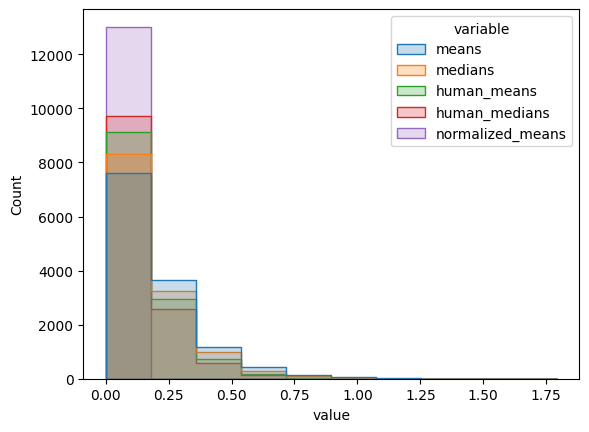

In [15]:
xy = pd.DataFrame(metrics)
xyz = xy.reset_index().drop(columns=['protein_id'])
ab = xyz.melt()

bins = [x/100 for x in range(0, 76, 2)]
sns.histplot(data=ab, x='value', hue='variable', bins=10, element='step')

<Axes: xlabel='value', ylabel='Probability'>

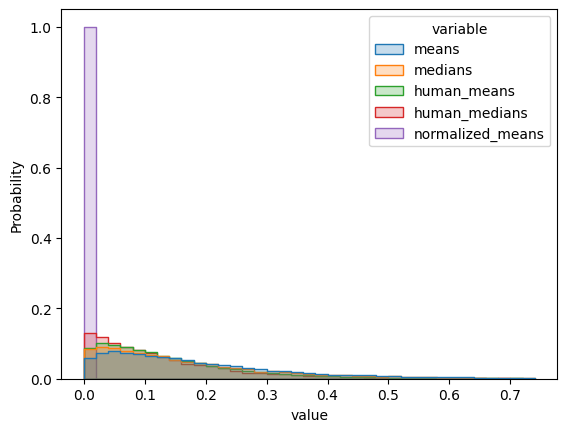

In [16]:
sns.histplot(data=ab, x='value', hue='variable', bins=bins, element='step', stat='probability', common_norm=False)

Zdá sa, že normalized_means dáva veľmi veľa proteínom veľmi nízku rýchlosť mutácie, zatiaľ čo distribúcia means vyzerá vyrovnanejšie, do najnižšieho intervalu priradí najmenej proteínov z vyskúšaných spôsobov na odhadnutie rýchlosti mutácií.

Asi nakoniec zoberiem priemer z troch metrík ktoré zahŕňajú všetky organizmy, keďže mi nenapadá vhodný spôsob ako rozlíšiť kvalitu daných odhadov.

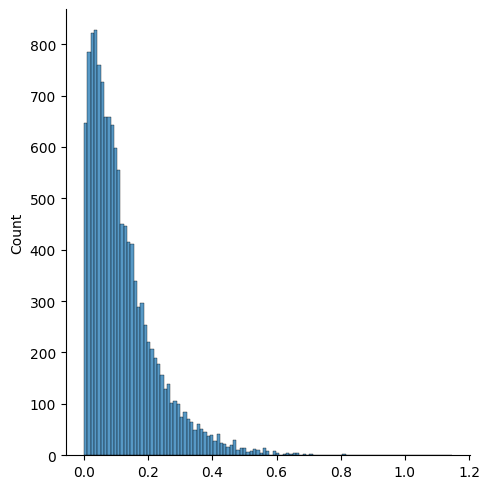

In [17]:
mean_mean = xy[['means', 'medians', 'normalized_means']].mean(axis=1)
sns.displot(mean_mean)

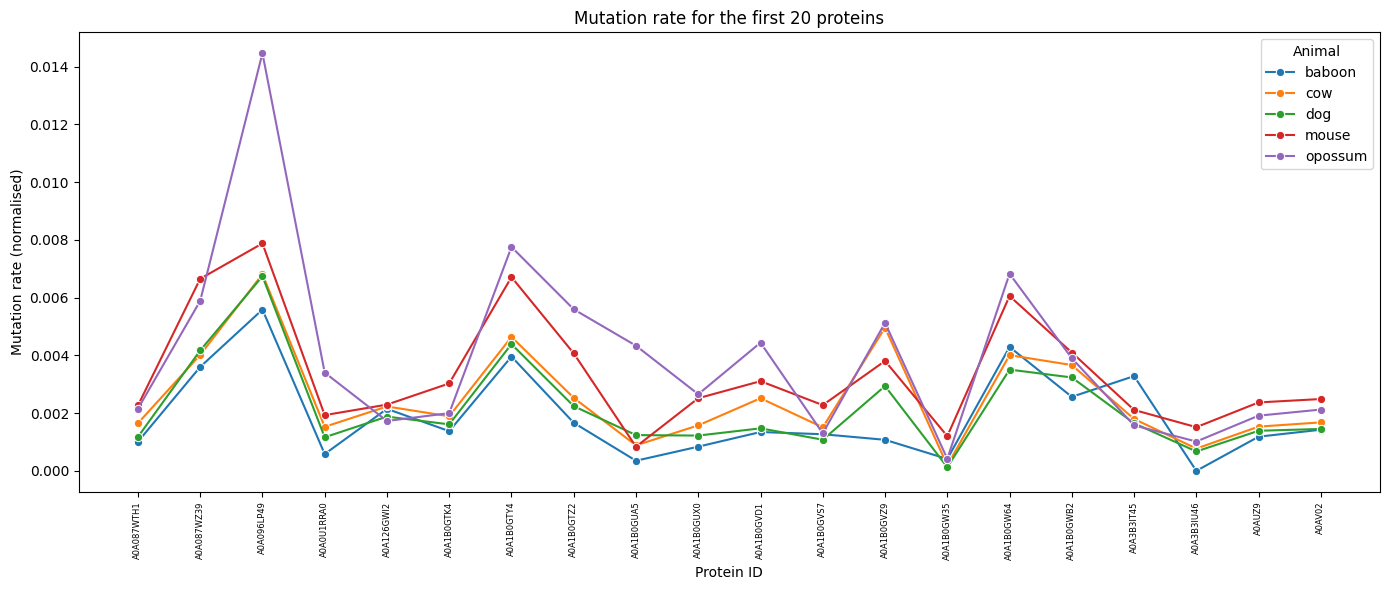

In [18]:
# nastavenia
top_n = 20
animals = ['human-baboon', 'human-cow', 'human-dog', 'human-mouse', 'human-opossum']

# priprava dat
subset = normalized.iloc[:top_n][animals].copy()
subset['protein_id'] = subset.index
long_df = subset.melt(id_vars='protein_id', var_name='Animal', value_name='speed_of_mutation')
long_df['Animal'] = long_df['Animal'].str.replace('human-', '', regex=False)

# graf:
plt.figure(figsize=(14, 6))
sns.lineplot(data=long_df, x='protein_id', y='speed_of_mutation', hue='Animal', marker='o')
plt.xticks(rotation=90, fontsize=6)
plt.title(f'Mutation rate for the first {top_n} proteins')
plt.ylabel('Mutation rate (normalised)')
plt.xlabel('Protein ID')
plt.legend(title='Animal')
plt.tight_layout()
plt.show()